# Retreival Augmented Generation - RAG


What is Retrieval Augmented Generation?

Retrieval Augmented Generation (RAG) is a prompt engineering method designed to provide context, dynamically, based on the specific situation. Instead of requiring the model to sift through its entire training dataset, RAG fetches the most pertinent context for the model.

How RAG works with embeddings

RAG will search through previous message embeddings and compare their similarity to the latest message. This similarity is quantified as a single number, often calculated using Cosine similarity. For instance, a similarity score of 0.8 between embedding A and B indicates that they are approximately 80% alike.

Once all embeddings that are above the similarity threshold have been identified, they are sent to the chatbot as context.

The prompt might look something like this:

‍

Below are some of the most important and relevant interactions from this chat:

{{Matching_Embeddings}}

Use the above information to answer the following question:

{{User_Question}}

‍

Here’s what the flow might look like:

Pros

Focused Contextual Understanding: Embeddings enable us to retrieve the most relevant parts of the conversation, enhancing the chatbot’s coherence and contextual awareness..
Efficient Conversation Management: Instead of having to revisit the entire conversation history, RAG pinpoints the most relevant sections.
Dynamic Adaptability: As the conversation evolves, RAG adjusts, bringing forward the most relevant historical context, regardless if it was from message 1 or message 100.
Better UX: The end results is a smoother, more natural conversation flow.
Cons

Complexity in Implementation: This method is harder to implement compared to some of the more basic methods we looked at before.
Balancing the Similarity Threshold: Similar to managing the sliding window, fine-tuning the similarity threshold will take some work. A strict threshold might overlook relevant sections, while a lenient one might retrieve excessive, potentially irrelevant sections.
Computational Overhead: While more efficient than processing raw text, continuously comparing embeddings will introduce some computational overhead.
Dependency on Quality Embeddings: This whole method hinges on the quality of the embeddings.
Implementing this method isn’t all that difficult, but making sure it works well in the real-world is where the real challenge lies. Specifically, determining the appropriate threshold for matching historical embeddings and refining the grounding prompt will require iteration.

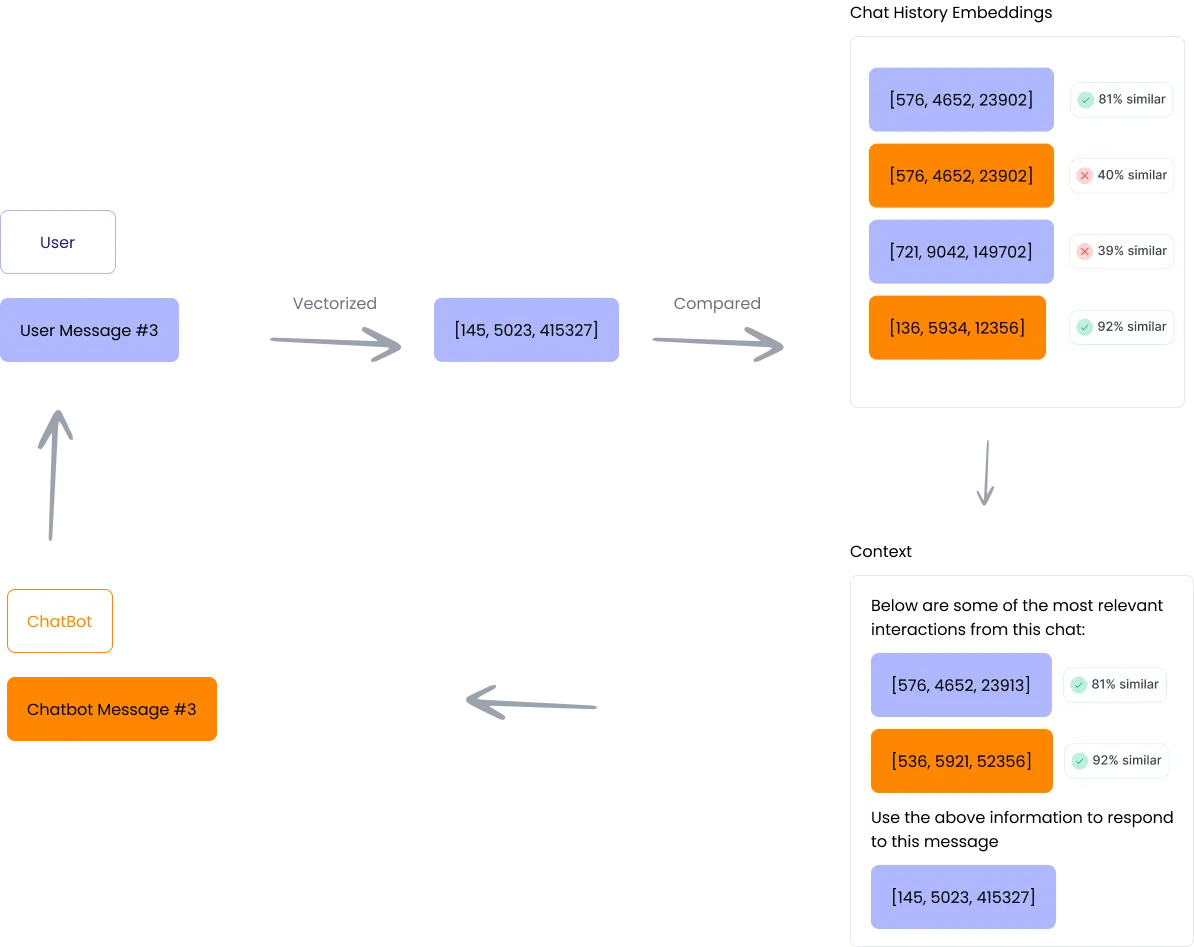

# Loading PDF file

In [ ]:
!pip install langchain
!pip install google-generativeai langchain-google-genai
!pip install chromadb
!pip install python-dotenv

In [ ]:
!pip install pypdf
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:

from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")



In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY,convert_system_message_to_human=True)

In [ ]:
# Method 1
from langchain_community.document_loaders import PyPDFLoader
# loader = PyPDFLoader("restaurant.pdf")
loader = PyPDFLoader("Machine Learning Basics.pdf")

docs = loader.load()

In [ ]:
#Method 2
from pypdf import PdfReader
# reader = PdfReader("prompt_engineering_tutorial.pdf")
reader = PdfReader("Machine Learning Basics.pdf")

pdf_texts = [p.extract_text().strip() for p in reader.pages]

# Filter the empty strings
pdf_texts = [text for text in pdf_texts if text]

# Splitting the text

In [ ]:
#Method 1
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
# Split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

print (f"Your {len(docs)} documents have been split into {len(splits)} chunks")

Your 741 documents have been split into 3516 chunks


In [ ]:
splits

[Document(page_content='Fiktives Restaurant: Gourmet\'s Delight  \nQ1: What is the name of the restaurant?  \nA1: The restaurant is named "Gourmet\'s Delight".  \n \nQ2: Where is Gourmet\'s Delight located?  \nA2: It is located in the heart of downtown, on Maple Street.  \n \nQ3: What type of cuisine does Gourmet\'s Delight offer?  \nA3: Gourmet\'s Delight specializes in a fusion of Mediterranean and Asian \ncuisine.  \n \nQ4: Is the restaurant vegetarian -friendly?', metadata={'source': 'restaurant.pdf', 'page': 0}),
 Document(page_content="Q3: What type of cuisine does Gourmet's Delight offer?  \nA3: Gourmet's Delight specializes in a fusion of Mediterranean and Asian \ncuisine.  \n \nQ4: Is the restaurant vegetarian -friendly?  \nA4: Yes, there is a wide range of vegetarian and vegan options available.  \n \nQ5: Does Gourmet's Delight accept reservations?  \nA5: Yes, guests are encouraged to make reservations, especially on \nweekends.  \n \nQ6: Are there any special dishes that are

In [ ]:
#Method 2

from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter
from langchain.vectorstores import Chroma
# Split
character_splitter = RecursiveCharacterTextSplitter(
        separators=["\n\n", "\n", ". ", " ", ""],
        chunk_size=1000,
        chunk_overlap=100
    )
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=20, tokens_per_chunk=384)

token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)


print (f"Your {len(pdf_texts)} documents have been split into {len(token_split_texts)} chunks")

In [ ]:
token_split_texts

# Embedding the text

In [ ]:
#Method 1
from langchain.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

if 'vectordb' in globals(): # If you've already made your vectordb this will delete it so you start fresh
    vectordb.delete_collection()

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)
vector_index = Chroma.from_documents(documents=splits, embedding=embeddings).as_retriever(search_kwargs={"k":100})

In [ ]:
#Methods 2
from langchain.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

if 'vectordb' in globals(): # If you've already made your vectordb this will delete it so you start fresh
    vectordb.delete_collection()

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)
vector_index = Chroma.from_texts(texts=token_split_texts, embedding=embeddings).as_retriever(search_kwargs={"k":100})

# Retrieval QA

In [ ]:
from langchain.chains import RetrievalQA
qa_chain = RetrievalQA.from_chain_type(
     llm,
    retriever=vector_index,
    return_source_documents=True

)


In [ ]:

# question ="What are the different types of machine learing"
# question = "What is overfitting"
# question = "what are the different types of unsupervised learning"
# question = "What is Dimensionality reduction"
question =" What is Predictive models?"
# question ="What is Descriptive models?"

result = qa_chain({"query": question})
result["result"]

'Models for supervised learning or predictive models try to predict certain\nvalue using the input data set.'

In [ ]:

Markdown(result["result"])

Models for supervised learning or predictive models try to predict certain
value using the input data set.

#  MultiQueryRetriever

In [ ]:
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain.prompts import PromptTemplate

In [ ]:
# question = "What are the benefit of Prompt Engineering " #ok
# question = " what are tasks that can be benefited from prompt engineering" #ok
# question = "describe what is prompt engineering?" #ok
# question = "What are the Techniques for prompt engineering" #ok
# question ="What is generative AI"


# question="I want to hold a larg event in the restaurant, can the resturant provide the service? "

retriever_from_llm = MultiQueryRetriever.from_llm(
    retriever=vector_index, llm=llm
)

In [ ]:
unique_docs = retriever_from_llm.get_relevant_documents(query=question)
# unique_docs

In [ ]:
prompt_template = """Use the following pieces of context to answer the question at the end in details.
If you don't know the answer, just say that you don't know, don't try to make up an answer.


{context}

Question: {question}
Answer:"""
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

In [ ]:
Markdown(llm.predict(text=PROMPT.format_prompt(
    context=unique_docs,
    question=question
).text))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `predict` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Predictive models are used to predict the value of a target feature, which is of categorical type, for the test data on the basis of the information imparted by the training data.

# Hybrid Retiever

In [ ]:
!pip install rank_bm25

In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever
# initialize the bm25 retriever and faiss retriever
bm25_retriever = BM25Retriever.from_documents(splits)
bm25_retriever.k = 50

In [ ]:
# initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, vector_index], weights=[0.2, 0.8])

In [ ]:
# question="I want to hold a larg event in the restaurant, can the resturant provide the service? "

ensemble_docs = ensemble_retriever.get_relevant_documents(question)
len(ensemble_docs)

147

In [ ]:
prompt_template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}

Question: {question}
Answer:"""
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

# question = "What are the Task specific prompt?"
# question ="What is prompt engineering?"
# question = "list the Techniques to do prompt engineering"

llm.predict(text=PROMPT.format_prompt(
    context=ensemble_docs,
    question=question
).text)

'Models for unsupervised learning or descriptive models are used to describe a data set or gain insight from a data set. The method of partitioning the input data into two parts – training and test data, which is holding back a part of the input data for validating the trained model is known as holdout method.'